# get data

In [1]:
import scipy.io as sio
mnist_raw = sio.loadmat('datasets/mnist/mnist-original.mat')
X, y = mnist_raw['data'].transpose(), mnist_raw['label'].transpose().ravel()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# plotting

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("on")

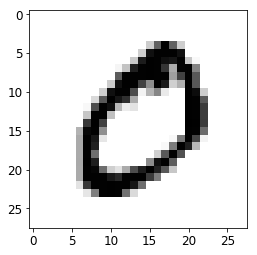

In [4]:
plot_digit(X_train[0])

# shifting

In [5]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit, delta):
    return shift(digit.reshape(28, 28), delta).reshape(28 * 28)

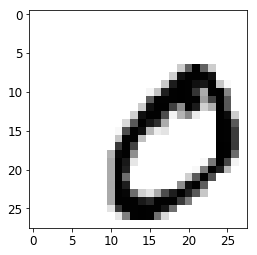

In [6]:
plot_digit(shift_digit(X_train[0], [3, 4]))

# enhance data set

In [7]:
X_train_expanded = []
y_train_expanded = []

for (X, y) in zip(X_train, y_train):
    for delta in ([0, 0], [-1, 0], [1, 0], [0, -1], [0, 1]):
        X_train_expanded.append(shift_digit(X, delta))
        y_train_expanded.append(y)

# train & eval

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

In [10]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [11]:
y_test_pred = knn_clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred, y_test)

0.9763

# result

Accuracy has increased from .9714 to .9763.